<a href="https://colab.research.google.com/github/mahmud-sayed-alamin/GNN-Water-mark/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

In [12]:
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

In [6]:
model = GCN(
    in_channels=1433,
    hidden_channels=128,
    out_channels=7
)

In [7]:
import torch.nn.functional as F

def compute_loss(output, y, mask):
    loss = F.nll_loss(output[mask], y[mask])
    return loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-2)

In [8]:
def train(data):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = compute_loss(output, data.y, data.train_mask)
    loss.backward()
    optimizer.step()
    return loss.item()

In [9]:
def test(data):
    model.eval()
    output = model(data.x, data.edge_index)
    pred = output.argmax(dim=1)
    accs = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        correct = pred[mask].eq(data.y[mask]).sum().item()
        acc = correct / mask.sum().item()
        accs.append(acc)
    return accs

In [13]:
for epoch in range(260):
    loss = train(data)
    train_acc, val_acc, test_acc = test(data)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch:03d}, Loss: {loss:.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}")

Epoch: 000, Loss: 1.9428, Train Acc: 0.8071, Val Acc: 0.5140, Test Acc: 0.5540
Epoch: 010, Loss: 0.8913, Train Acc: 0.9500, Val Acc: 0.7780, Test Acc: 0.7970
Epoch: 020, Loss: 0.6728, Train Acc: 0.9857, Val Acc: 0.7840, Test Acc: 0.8130
Epoch: 030, Loss: 0.6971, Train Acc: 0.9786, Val Acc: 0.7820, Test Acc: 0.8130
Epoch: 040, Loss: 0.7426, Train Acc: 0.9714, Val Acc: 0.7840, Test Acc: 0.8110
Epoch: 050, Loss: 0.7326, Train Acc: 0.9786, Val Acc: 0.7800, Test Acc: 0.8110
Epoch: 060, Loss: 0.7201, Train Acc: 0.9857, Val Acc: 0.7820, Test Acc: 0.8140
Epoch: 070, Loss: 0.7257, Train Acc: 0.9857, Val Acc: 0.7840, Test Acc: 0.8110
Epoch: 080, Loss: 0.7246, Train Acc: 0.9857, Val Acc: 0.7820, Test Acc: 0.8130
Epoch: 090, Loss: 0.7226, Train Acc: 0.9857, Val Acc: 0.7800, Test Acc: 0.8140
Epoch: 100, Loss: 0.7245, Train Acc: 0.9714, Val Acc: 0.7820, Test Acc: 0.8120
Epoch: 110, Loss: 0.7251, Train Acc: 0.9857, Val Acc: 0.7800, Test Acc: 0.8110
Epoch: 120, Loss: 0.7225, Train Acc: 0.9857, Val Acc

In [14]:
def evaluate(data):
    model.eval()

    with torch.no_grad():
        output = model(data.x, data.edge_index)

    predictions = output.argmax(dim=1)

    accuracies = {}
    for mask_name, mask in [('Train', data.train_mask),
                            ('Validation', data.val_mask),
                            ('Test', data.test_mask)]:
        correct = predictions[mask].eq(data.y[mask]).sum().item()
        total = mask.sum().item()
        accuracy = correct / total
        accuracies[mask_name] = accuracy

    return accuracies

In [15]:
train_acc_list = []
val_acc_list = []
loss_list = []

for epoch in range(200):
    loss = train(data)
    loss_list.append(loss)

    accuracies = evaluate(data)
    train_acc_list.append(accuracies['Train'])
    val_acc_list.append(accuracies['Validation'])

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, "
              f"Train Acc: {accuracies['Train']:.4f}, "
              f"Val Acc: {accuracies['Validation']:.4f}, "
              f"Test Acc: {accuracies['Test']:.4f}")



Epoch 000, Loss: 0.7156, Train Acc: 0.9857, Val Acc: 0.7840, Test Acc: 0.8130
Epoch 010, Loss: 0.7186, Train Acc: 0.9786, Val Acc: 0.7840, Test Acc: 0.8130
Epoch 020, Loss: 0.7115, Train Acc: 0.9786, Val Acc: 0.7820, Test Acc: 0.8140
Epoch 030, Loss: 0.7167, Train Acc: 0.9786, Val Acc: 0.7860, Test Acc: 0.8150
Epoch 040, Loss: 0.7171, Train Acc: 0.9786, Val Acc: 0.7840, Test Acc: 0.8150
Epoch 050, Loss: 0.7130, Train Acc: 0.9786, Val Acc: 0.7840, Test Acc: 0.8140
Epoch 060, Loss: 0.7134, Train Acc: 0.9786, Val Acc: 0.7820, Test Acc: 0.8130
Epoch 070, Loss: 0.7173, Train Acc: 0.9786, Val Acc: 0.7840, Test Acc: 0.8150
Epoch 080, Loss: 0.7134, Train Acc: 0.9786, Val Acc: 0.7900, Test Acc: 0.8140
Epoch 090, Loss: 0.7154, Train Acc: 0.9857, Val Acc: 0.7840, Test Acc: 0.8130
Epoch 100, Loss: 0.7136, Train Acc: 0.9786, Val Acc: 0.7780, Test Acc: 0.8120
Epoch 110, Loss: 0.7158, Train Acc: 0.9714, Val Acc: 0.7860, Test Acc: 0.8140
Epoch 120, Loss: 0.7146, Train Acc: 0.9786, Val Acc: 0.7780, Tes

In [16]:
def generate_trigger_graph(data, model, num_trigger_nodes=10, target_label=0):
    model.eval()
    with torch.no_grad():
        output = model(data.x, data.edge_index)
        predictions = output.argmax(dim=1)

    target_nodes = torch.where(predictions == target_label)[0][:num_trigger_nodes]

    trigger_features = data.x[target_nodes].clone()

    num_original_nodes = data.x.shape[0]

    trigger_indices = torch.arange(num_original_nodes, num_original_nodes + num_trigger_nodes)

    new_edges = torch.cat([
        torch.stack([trigger_indices, target_nodes], dim=0),
        torch.stack([target_nodes, trigger_indices], dim=0)
    ], dim=1)

    return {
        'features': trigger_features,
        'edges': new_edges,
        'nodes': trigger_indices
    }

In [17]:
def train_with_watermark(data, trigger_graph, target_label):
    model.train()
    optimizer.zero_grad()

    # Combine clean graph with trigger graph
    x_combined = torch.cat([data.x, trigger_graph['features']], dim=0)
    edge_index_combined = torch.cat([data.edge_index, trigger_graph['edges']], dim=1)

    output = model(x_combined, edge_index_combined)

    loss = F.nll_loss(output[data.train_mask], data.y[data.train_mask])

    trigger_loss = F.nll_loss(output[trigger_graph['nodes']], target_label)
    total_loss = loss + trigger_loss

    total_loss.backward()
    optimizer.step()
    trigger_graph
    return total_loss.item()

In [18]:
def verify_ownership(model, data, trigger_graph, target_label):
    model.eval()

    # Combine original data with trigger graph
    x_combined = torch.cat([data.x, trigger_graph['features']], dim=0)
    edge_index_combined = torch.cat([data.edge_index, trigger_graph['edges']], dim=1)

    with torch.no_grad():
        output = model(x_combined, edge_index_combined)

    predictions = output[trigger_graph['nodes']].argmax(dim=1)

    trigger_accuracy = (predictions == target_label).sum().item() / len(trigger_graph['nodes'])

    return trigger_accuracy

In [19]:
def create_new_data(data, trigger_graph):
    num_original_nodes = data.x.shape[0]

    new_x = torch.cat([data.x, trigger_graph['features']], dim=0)

    new_edge_index = torch.cat([data.edge_index, trigger_graph['edges']], dim=1)

    new_y = torch.cat([data.y, torch.full((trigger_graph['nodes'].shape[0],), -1, dtype=torch.long)])

    # Extend masks
    new_train_mask = torch.cat([data.train_mask, torch.zeros(trigger_graph['nodes'].shape[0], dtype=torch.bool)])
    new_val_mask = torch.cat([data.val_mask, torch.zeros(trigger_graph['nodes'].shape[0], dtype=torch.bool)])
    new_test_mask = torch.cat([data.test_mask, torch.zeros(trigger_graph['nodes'].shape[0], dtype=torch.bool)])

    new_data = data.__class__(
        x=new_x,
        edge_index=new_edge_index,
        y=new_y,
        train_mask=new_train_mask,
        val_mask=new_val_mask,
        test_mask=new_test_mask
    )

    return new_data

trigger_graph = generate_trigger_graph(data, model)

new_data = create_new_data(data, trigger_graph)


In [20]:
# Evaluate Fidelity
original_model_performance = evaluate(data)
print(f"Train Acc: {original_model_performance['Train']}, Test Acc: {original_model_performance['Test']}")

watermarked_model_performance = evaluate(new_data)
print(f"Train Acc: {watermarked_model_performance['Train']}, Test Acc: {watermarked_model_performance['Test']}")

# Evaluate Watermark Effectiveness
trigger_graph = generate_trigger_graph(data, model)
trigger_accuracy = verify_ownership(model, data, trigger_graph, target_label=0)
print(f"Watermark Accuracy: {trigger_accuracy * 100:.2f}%")

Train Acc: 0.9857142857142858, Test Acc: 0.815
Train Acc: 0.9785714285714285, Test Acc: 0.814
Watermark Accuracy: 90.00%


In [30]:
from sklearn.metrics import precision_score

output = model(data.x, data.edge_index)
pred = output.argmax(dim=1)

y_true = data.y[data.test_mask].cpu().numpy()
y_pred = pred[data.test_mask].cpu().numpy()

# Calculate F1 score
precision = precision_score(y_true, y_pred, average='weighted')
print(f'F1 Score: {precision}')

F1 Score: 0.8310726392221233


In [32]:
output = model(new_data.x, new_data.edge_index)
pred = output.argmax(dim=1)

y_true = new_data.y[new_data.test_mask].cpu().numpy()
y_pred = pred[new_data.test_mask].cpu().numpy()

precision_triggered = precision_score(y_true, y_pred, average='weighted')
print(f'precision_triggered_Score: {precision_triggered}')

precision_triggered_Score: 0.8303219770274207


In [22]:
from sklearn.metrics import f1_score

output = model(data.x, data.edge_index)
pred = output.argmax(dim=1)

y_true = data.y[data.test_mask].cpu().numpy()
y_pred = pred[data.test_mask].cpu().numpy()

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.8172392592881118


In [23]:
output = model(new_data.x, new_data.edge_index)
pred = output.argmax(dim=1)

y_true = new_data.y[new_data.test_mask].cpu().numpy()
y_pred = pred[new_data.test_mask].cpu().numpy()

# Calculate F1 scoreaverage='weighted')
print(f'f1_triggered Score: {f1_triggered}')
f1_triggered = f1_score(y_true, y_pred,

f1_triggered Score: 0.8163706121044055


In [34]:
paper_results = {
    "Metric": ["Watermark accuracy"],
    "Paper verification performance": [99.00],
}

verification_performance = trigger_accuracy*100

results = {
    "Metric": ["Watermark accuracy"],
    "verification_performance": [verification_performance]
}

comparison_df = pd.DataFrame(paper_results).set_index("Metric")
comparison_df[["Verification performance"]] = pd.DataFrame(results).set_index("Metric")

print("\nComparison Table (GCN on Cora)\n")
print(comparison_df.to_markdown())


Comparison Table (GCN on Cora)

| Metric             |   Paper verification performance |   Verification performance |
|:-------------------|---------------------------------:|---------------------------:|
| Watermark accuracy |                               99 |                         90 |


In [35]:

# Paper results for GCN on Cora
paper_results = {
    "Metric": ["Accuracy", "Precision", "F1-Score"],
    "Paper Original": [83.74, 83.84, 83.70],
    "Paper Watermarked": [83.40, 83.47, 83.70],
}

model_accuracy_original = original_model_performance['Test']*100
model_accuracy_watermarked = watermarked_model_performance['Test']*100
verification_performance = trigger_accuracy*100

model_precision_original = precision * 100
model_precision_watermarked = precision_triggered * 100
model_f1_original = f1*100
model_f1_watermarked = f1_triggered*100

results = {
    "Metric": ["Accuracy", "Precision", "F1-Score"],
    "Original": [model_accuracy_original, model_precision_original, model_f1_original],
    "Watermarked": [model_accuracy_watermarked, model_precision_watermarked, model_f1_watermarked],
}

comparison_df = pd.DataFrame(paper_results).set_index("Metric")
comparison_df[["Original", "Watermarked"]] = pd.DataFrame(results).set_index("Metric")

print("\nComparison Table (GCN on Cora)\n")
print(comparison_df.to_markdown())


Comparison Table (GCN on Cora)

| Metric    |   Paper Original |   Paper Watermarked |   Original |   Watermarked |
|:----------|-----------------:|--------------------:|-----------:|--------------:|
| Accuracy  |            83.74 |               83.4  |    81.5    |       81.4    |
| Precision |            83.84 |               83.47 |    83.1073 |       83.0322 |
| F1-Score  |            83.7  |               83.7  |    81.7239 |       81.6371 |


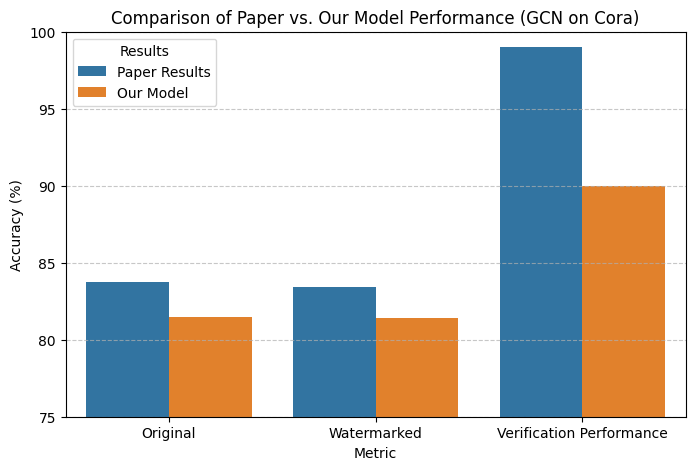

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["Original", "Watermarked", "Verification Performance"]
paper_values = [83.74, 83.40, 99.00]
model_values = [model_accuracy_original, model_accuracy_watermarked, verification_performance]

df = pd.DataFrame({
    "Metric": metrics,
    "Paper Results": paper_values,
    "Our Model": model_values
})

plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Metric", y="value", hue="variable", data=df.melt(id_vars=["Metric"], var_name="variable"))
plt.xlabel("Metric")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Paper vs. Our Model Performance (GCN on Cora)")
plt.ylim(75, 100)
plt.legend(title="Results")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
